Maia Petee

INFO 5502

# Classification: Assignment 7


---
*In this assignment, you are going to implement a KNN classifier for the dataset and validate your results.*




Download the iris data (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris (Links to an external site.))

In [58]:
import numpy as np
import sklearn
from sklearn import datasets
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

iris = sklearn.datasets.load_iris()
print(iris.feature_names, iris.data[:10]) # Getting a look at the feature names and the first ten rows (individuals) of our 150-row dataset

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [0]:
x, y = iris.data, iris.target # Here x is the features of each flower, and y is the target - the gold standard species classification based on these traits.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=4) # We will use 60% of the data for training and 40% for testing

Apply K-nearest-neighbor algorithm in iris classification;

In [55]:
# To decide the best k value we can look at a range of k values and estimate the accuracy of each one.
# The default KNN supplied by SciKit Learn uses 5 as a default k value
# We will examine k from 1 to 20.

possible_ks = np.arange(1, 20, 1)
scores = {}
score_list = []

for k in possible_ks:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  predict = knn.predict(x_test)
  scores[k] = metrics.accuracy_score(y_test, predict)
  print("When k is equal to",k,"accuracy is at", np.round(scores[k]*100, 2), "percent.")
  score_list.append(metrics.accuracy_score(y_test, predict))

When k is equal to 1 accuracy is at 95.0 percent.
When k is equal to 2 accuracy is at 95.0 percent.
When k is equal to 3 accuracy is at 96.67 percent.
When k is equal to 4 accuracy is at 96.67 percent.
When k is equal to 5 accuracy is at 96.67 percent.
When k is equal to 6 accuracy is at 98.33 percent.
When k is equal to 7 accuracy is at 98.33 percent.
When k is equal to 8 accuracy is at 98.33 percent.
When k is equal to 9 accuracy is at 98.33 percent.
When k is equal to 10 accuracy is at 98.33 percent.
When k is equal to 11 accuracy is at 98.33 percent.
When k is equal to 12 accuracy is at 98.33 percent.
When k is equal to 13 accuracy is at 98.33 percent.
When k is equal to 14 accuracy is at 98.33 percent.
When k is equal to 15 accuracy is at 98.33 percent.
When k is equal to 16 accuracy is at 98.33 percent.
When k is equal to 17 accuracy is at 98.33 percent.
When k is equal to 18 accuracy is at 96.67 percent.
When k is equal to 19 accuracy is at 98.33 percent.


Decide the best K value in this problem and give a brief explanation; 

([<matplotlib.axis.XTick at 0x7feb0ecb7da0>,
 <a list of 10 Text xticklabel objects>)

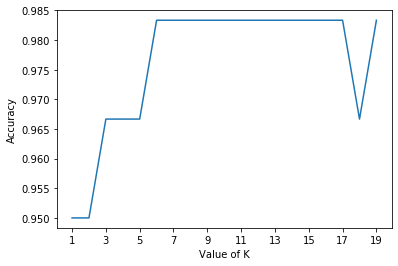

In [56]:
# We can visualize this problem with matplotlib

plt.plot(possible_ks, score_list)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.xticks(ticks=np.arange(1,20, 2))

It seems that according to this plot, increasing the value of k is extremely valuable until k=6, at which point the model seems to reach its maximum efficiency. Increasing k past this point doesn't necessarily help, and increasing it to 18 or greater actually sees a decrease in efficiency, probably because of overfitting to the training set.

### I'll choose a value of k = 6 and redo my predictions using that.

In [69]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)
predict = knn.predict(x_test)
print('Species predictions\n',predict,'\n') # This will return an array that makes a prediction (0, 1, or 2, each corresponding to a particular species)
               # for each individual (represented as a row in the dataset)

# Predicting the species of a random individual using our trained model.
sample_individual = np.array([4.2, 3.1, 1.5, 0.2]).reshape(1, -1)
sample_predict = knn.predict(sample_individual)
print("Our sample flower is predicted to be",sample_predict,"or",iris.target_names[sample_predict])

# We've done this above, but scoring this specific version of our KNN classifier.
score = metrics.accuracy_score(y_test, predict)
print("\nWhen k is equal to 6, accuracy is at", np.round(score*100, 2), "percent.")


Species predictions
 [2 0 2 2 2 1 2 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1 1 0 2 0 1 0 2 0 0 1 1 2 0 1 2 2 1 1 0 1 2 1] 

Our sample flower is predicted to be [0] or ['setosa']

When k is equal to 6, accuracy is at 98.33 percent.
